# Linear Regression - English Premier League

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy

In this notebook, I will be exploring a small dataset of football players to produce a simple linear regression model. The target variable is the players score (

## Load data

In [2]:
df = pd.read_csv('../raw_data/EPL_Soccer_MLR_LR.csv')
df.head(2)

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,Lionel Messi,Paris Saint-Germain,10.65,19,83.22,2.22,2.17,23.24,140.55,131.70,1.67,68.03,88.36
1,Cristiano Ronaldo,Manchester United,10.24,20,140.82,1.16,10.15,26.84,62.75,38.85,1.88,75.21,74.84


## Exploratory analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              51 non-null     object 
 1   Club                    51 non-null     object 
 2   DistanceCovered(InKms)  51 non-null     float64
 3   Goals                   51 non-null     int64  
 4   MinutestoGoalRatio      51 non-null     float64
 5   ShotsPerGame            51 non-null     float64
 6   AgentCharges            51 non-null     float64
 7   BMI                     51 non-null     float64
 8   Cost                    51 non-null     float64
 9   PreviousClubCost        51 non-null     float64
 10  Height                  51 non-null     float64
 11  Weight                  51 non-null     float64
 12  Score                   51 non-null     float64
dtypes: float64(10), int64(1), object(2)
memory usage: 5.3+ KB


In [4]:
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,8.527647,21.352941,111.570588,3.435294,8.004902,24.050392,112.180000,58.741569,1.776275,75.348431,72.938431
std,2.153868,11.081198,39.570755,1.487948,4.240532,2.605327,51.471379,38.183369,0.114367,8.282808,14.145136
min,5.030000,1.000000,41.700000,1.160000,0.620000,19.490000,20.010000,6.220000,1.600000,61.230000,50.030000
25%,6.760000,14.000000,85.055000,2.030000,4.400000,21.375000,69.820000,29.870000,1.680000,68.555000,60.555000
50%,8.220000,20.000000,114.130000,3.510000,8.040000,23.980000,105.310000,53.830000,1.750000,75.210000,74.260000
75%,10.610000,29.000000,149.265000,4.495000,11.690000,26.775000,158.015000,79.670000,1.875000,82.360000,84.325000
max,11.790000,40.000000,173.580000,5.960000,14.490000,27.940000,197.830000,181.170000,1.990000,94.170000,99.090000


In [5]:
df.corr(numeric_only=True)

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.115306,0.264567,0.087509,0.290809,-0.075575,-0.027228,0.195270,0.153050,0.202924,-0.050494
Goals,0.115306,1.000000,0.089433,0.175076,-0.227396,-0.109592,0.187645,0.123533,-0.130873,-0.081830,0.043851
MinutestoGoalRatio,0.264567,0.089433,1.000000,-0.322639,-0.010859,-0.173981,-0.083352,0.207057,0.221376,0.004649,0.078344
ShotsPerGame,0.087509,0.175076,-0.322639,1.000000,-0.002558,-0.015203,0.080845,0.027602,-0.113378,0.070588,0.039031
AgentCharges,0.290809,-0.227396,-0.010859,-0.002558,1.000000,0.005356,-0.112105,-0.147686,0.094748,0.114885,-0.059535
BMI,-0.075575,-0.109592,-0.173981,-0.015203,0.005356,1.000000,-0.250264,-0.209391,-0.222767,-0.103450,-0.123289
Cost,-0.027228,0.187645,-0.083352,0.080845,-0.112105,-0.250264,1.000000,0.550317,0.009825,0.300642,0.277308
PreviousClubCost,0.195270,0.123533,0.207057,0.027602,-0.147686,-0.209391,0.550317,1.000000,0.020854,0.299599,0.395932
Height,0.153050,-0.130873,0.221376,-0.113378,0.094748,-0.222767,0.009825,0.020854,1.000000,0.131300,-0.005171
Weight,0.202924,-0.081830,0.004649,0.070588,0.114885,-0.103450,0.300642,0.299599,0.131300,1.000000,0.158734


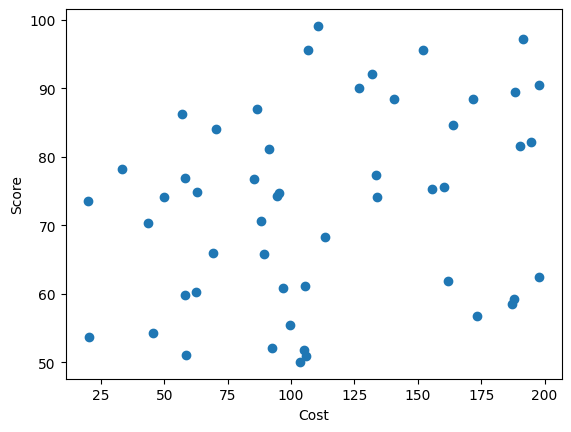

In [6]:
plt.scatter(df['Cost'], df['Score'])
plt.xlabel('Cost')
plt.ylabel('Score');

There is a strong linear association between Cost and Score! 

## Train test split

To model this relationship using a simple linear regression, we need to separate out X (Cost of the player) and y (Score of the player). 

We also need to do a train test split to avoid overfitting.

In [7]:
# separate X and y
X = df['Cost']
y = df['Score']

# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [8]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (38,)
X_test shape: (13,)
y_train shape: (38,)
y_test shape: (13,)


## Simple Linear Regression

We will fit the model:
![equation](https://latex.codecogs.com/svg.image?Score&space;=&space;\beta&space;_{0}&plus;\beta&space;_{1}*Cost)

In [9]:
lr = sm.OLS(y_train, X_train).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.837
Method:                 Least Squares   F-statistic:                              196.1
Date:                Mon, 23 Sep 2024   Prob (F-statistic):                    2.31e-16
Time:                        17:35:54   Log-Likelihood:                         -182.44
No. Observations:                  38   AIC:                                      366.9
Df Residuals:                      37   BIC:                                      368.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.5544      0.040     14.003      0.000       0.474       0.635
==============================================================================
Omnibus:                        2.001   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.368   Jarque-Bera (JB):                1.217
Skew:                          -0.076   Prob(JB):                        0.544
Kurtosis:                       2.137   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Add an intercept
X_train_with_intercept = sm.add_constant(data=X_train)
lr = sm.OLS(endog=y_train, exog=X_train_with_intercept).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     4.772
Date:                Mon, 23 Sep 2024   Prob (F-statistic):             0.0355
Time:                        17:35:54   Log-Likelihood:                -152.04
No. Observations:                  38   AIC:                             308.1
Df Residuals:                      36   BIC:                             311.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.1902      5.214     11.926      0.000      51.615      72.766
Cost           0.0932      0.043      2.184      0.036       0.007       0.180
==============================================================================
Omnibus:                        3.099   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                1.502
Skew:                          -0.063   Prob(JB):                        0.472
Kurtosis:                       2.034   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**If we increase Cost by 1, we estimate that Score will increase by 0.1821.**

Based on the P values for both parameters, we can reject the null hypothesis. That is to say that Cost has a statistically significant impact on Score.

The R-Squared of 0.930 tells us that 93% of the variance in Score can be predicted by the variance in Cost.

## Plots and basic analysis

In [11]:
# Extract parameter estimates b0 and b1
b0 = lr.params[0]
b1 = lr.params[1]

/var/folders/bm/q77j4spj5nsbdchm0916yf5r0000gn/T/ipykernel_42165/985323634.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0 = lr.params[0]
/var/folders/bm/q77j4spj5nsbdchm0916yf5r0000gn/T/ipykernel_42165/985323634.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1 = lr.params[1]


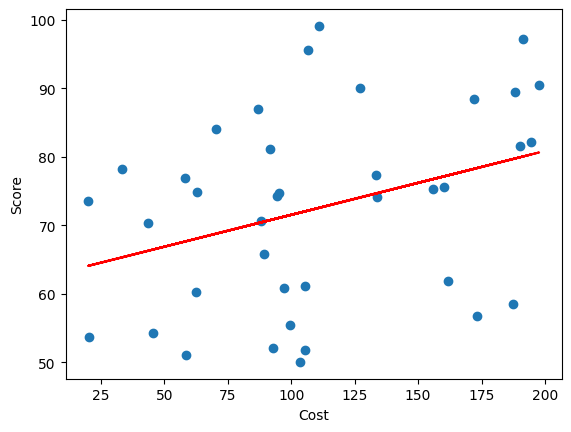

In [12]:
# Plot the fitted line on our training data
plt.scatter(X_train, y_train)
plt.plot(X_train, b0 + b1*X_train, 'r')
plt.xlabel("Cost")
plt.ylabel("Score");

The model tends to overestimate the Score of a player when the Cost increases above 150. This suggests that the Premier League is overpaying some players based on their Score. Although there are only a few data points above a Cost of 150.

We could split the data at a Cost of 150 and do fit a second model (Piecewise Linear Regression).

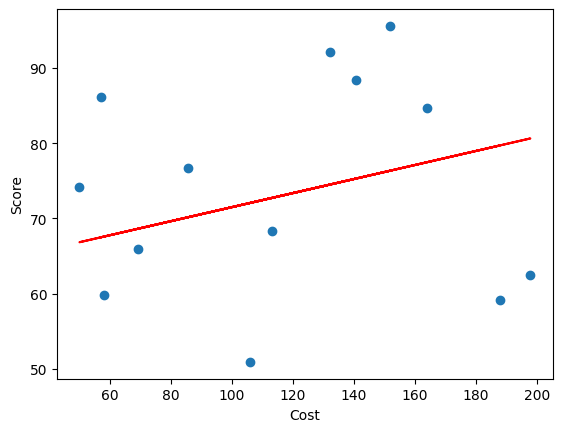

In [13]:
# Plot the fitted line on test data

# Add intercept to X_test
X_test_with_intercept = sm.add_constant(data=X_test)

# predict y fitted
y_test_fitted = lr.predict(X_test_with_intercept)

# plot
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_fitted, 'r')
plt.xlabel("Cost")
plt.ylabel("Score");

The model also seems to be doing well against the test data. 

There doesn't seem to be any sort of pattern in the residuals - i.e. we are not overestimating or estimating in general.

However, one thing to note is that the maximum Cost value in our test data is ~125, whereas in our train data the max value was ~200. And we started to see a breakdown in the models ability to predict a players Score above a Cost of 150. 

## Regression diagnostics 

### Non-linearity 

Here we are looking to see if the residuals of the model have a non-linear relationship with Cost.

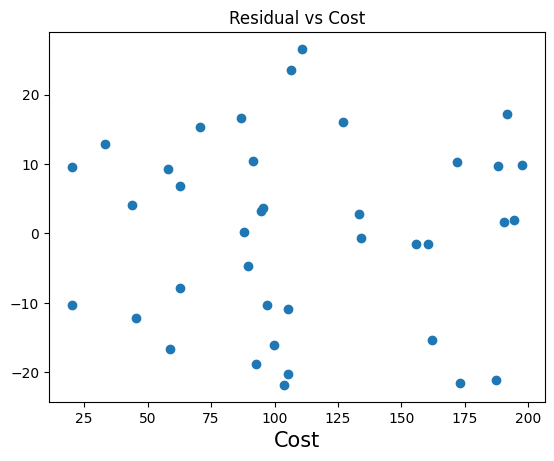

In [14]:
# get our train residuals
y_train_fitted = lr.predict(X_train_with_intercept)
r_i = (y_train - y_train_fitted)

# Residual vs Cost plot
plt.title("Residual vs Cost")
plt.xlabel("Cost", fontsize=15)
plt.scatter(X_train, r_i);

For non-linearity, we are looking for some kind of pattern. If the errors are non-linear, we might see the residuals increasing/decreasing against cost. 

In the above plot the residuals look linear for Cost < 150. However, for Cost > 150 we can't be as confident.

We should try to get more data for players with a Cost of 150. Otherwise, we should be cautious about predicting beyond a Cost of 150.

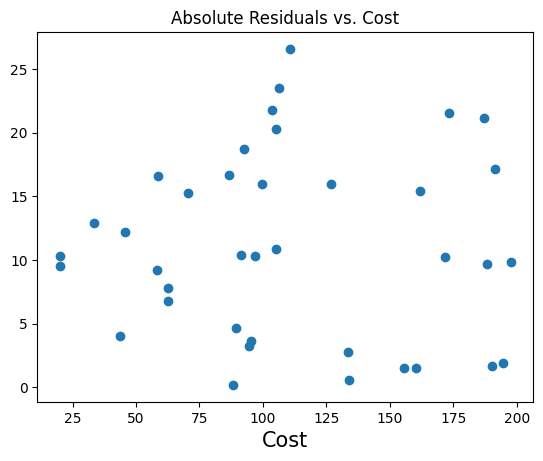

In [15]:
#Absolute residuals against predictor
abs_r_i = np.abs(y_train - y_train_fitted)
plt.title('Absolute Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(X_train, abs_r_i)
plt.show()

### Heteroskedacity (non-constant variance)

Heteroskedacitity: The variance in our predicted variable is not the same across all values of X. If our errors are heteroskedastic, we can either:
- Transform the errors
- Use Weighted Least Squares

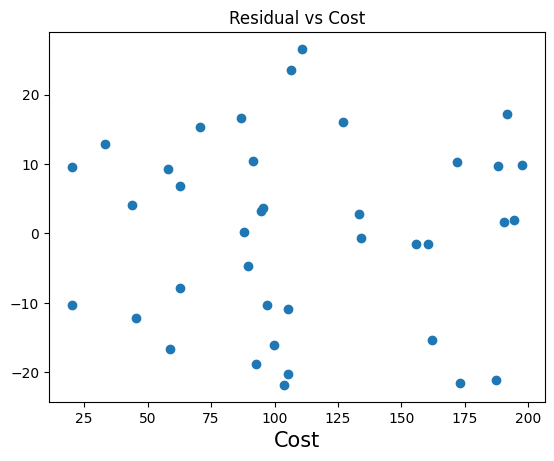

In [16]:
# Residual vs Cost plot
plt.title("Residual vs Cost")
plt.xlabel("Cost", fontsize=15)
plt.scatter(X_train, r_i);

No strong evidence of non-constant variance in the residuals.

### Deviations from normality

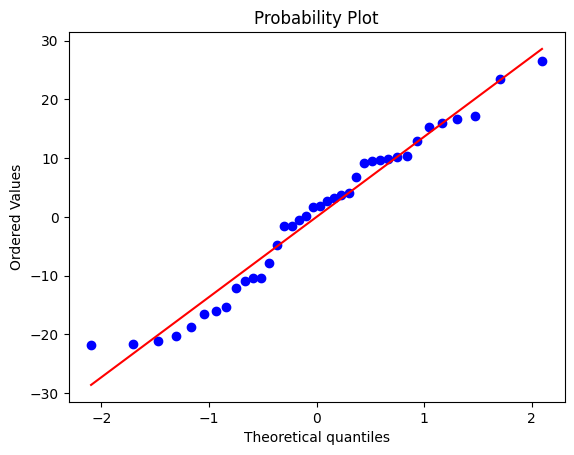

In [17]:
#Normality plot
scipy.stats.probplot(r_i,plot=plt);

Tails might be a little heavy, but overall no clear reason to reject normality expectations because the residuals lie on the line.

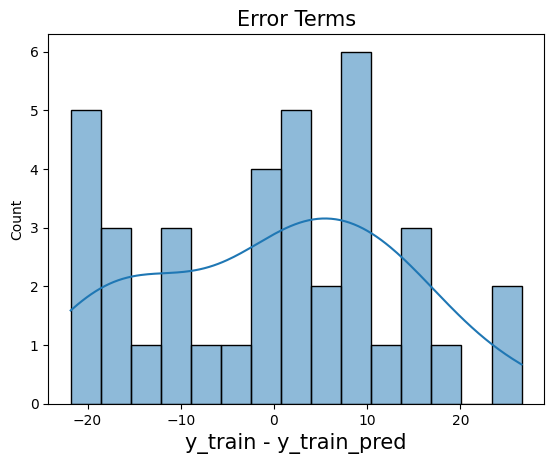

In [18]:
# Evaluate normality through histogram of residuals
# Plotting the histogram using the residual values
fig = plt.figure()
sns.histplot(r_i, kde=True, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

The errors look to be approximately Normally distributed. With more data, we'd expect it to converge even more to a normal distribution

### Outliers

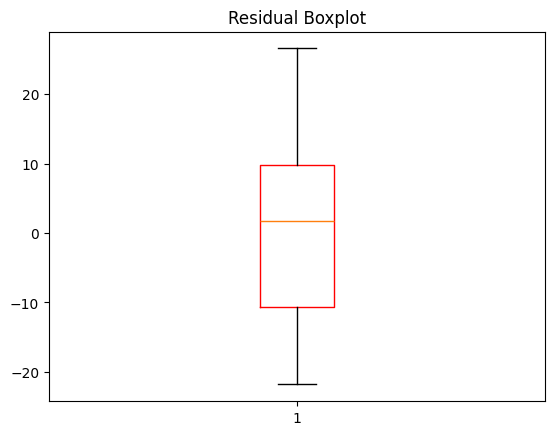

In [19]:
#Boxplot for outliers
# plot
plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title('Residual Boxplot');

There are some extreme outliers, but not that many of them. Overall, we wouldn't eliminate any values.

### Missing predictor variables

There are other variables that we are not accounting for that could have an effect on Score. For example, if we account for average distance covered, minutes to goal ratio or the club that a player plays for, then the relationship between Cost and Score might be less strong.

## Non-constant variance demo

In [20]:
#Demo of how to deal with non-constant variance through transformations

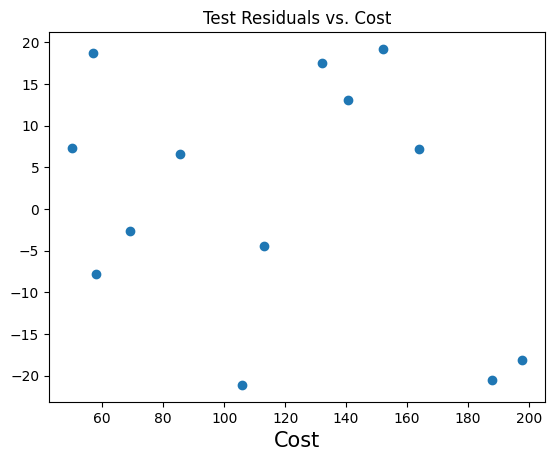

In [21]:
test_residuals = (y_test - y_test_fitted)
plt.title('Test Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(X_test, test_residuals);

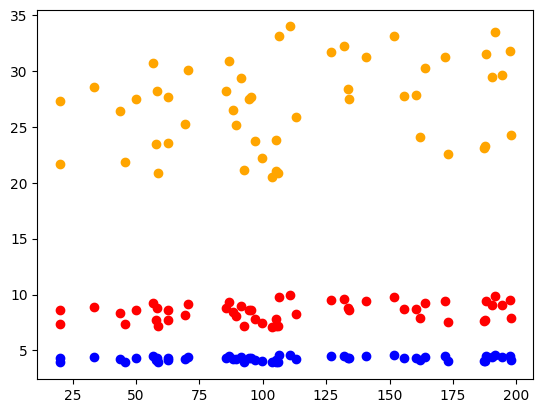

In [22]:
#Try sqrt
sqrt_y=np.sqrt(y)
plt.scatter(X, sqrt_y,color='red');

#Try ln
ln_y=np.log(y)
plt.scatter(X, ln_y,color='blue');


#Let's try a BC transformation

#Box Cox procedure on all cost
bc_y=list(stats.boxcox(y))
bc_y=bc_y[0]
plt.scatter(X, bc_y,color='orange');

#Overall, most satisfied with the sqrt transformation

## Adjusting the model

Lets re-run the regression with the square root of Score as the target.

In [23]:
#Run regression on this set

x_train, x_test, y_train, y_test = train_test_split(X, sqrt_y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)


#force intercept term
x_train_with_intercept = sm.add_constant(data=x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     4.596
Date:                Mon, 23 Sep 2024   Prob (F-statistic):             0.0389
Time:                        17:35:56   Log-Likelihood:                -44.714
No. Observations:                  38   AIC:                             93.43
Df Residuals:                      36   BIC:                             96.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8734      0.309     25.444      0.000       7.246       8.501
Cost           0.0054      0.003      2.144      0.039       0.000       0.011
==============================================================================
Omnibus:                        4.229   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                1.877
Skew:                          -0.178   Prob(JB):                        0.391
Kurtosis:                       1.971   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const    7.873359
Cost     0.005428
dtype: float64


/var/folders/bm/q77j4spj5nsbdchm0916yf5r0000gn/T/ipykernel_42165/4026612054.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0=lr.params[0]
/var/folders/bm/q77j4spj5nsbdchm0916yf5r0000gn/T/ipykernel_42165/4026612054.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1=lr.params[1]


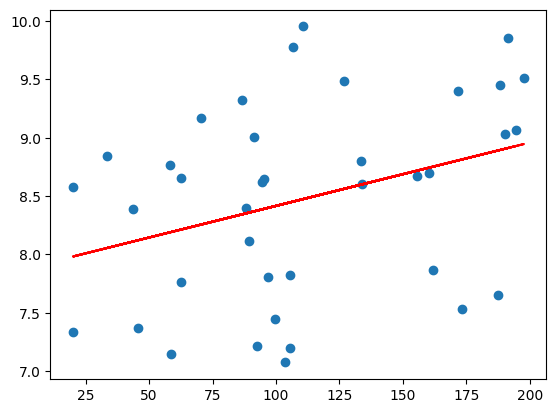

In [24]:
#Extract the B0, B1
print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
plt.scatter(x_train, y_train)
plt.plot(x_train, b0+ b1*x_train, 'r')
plt.show()

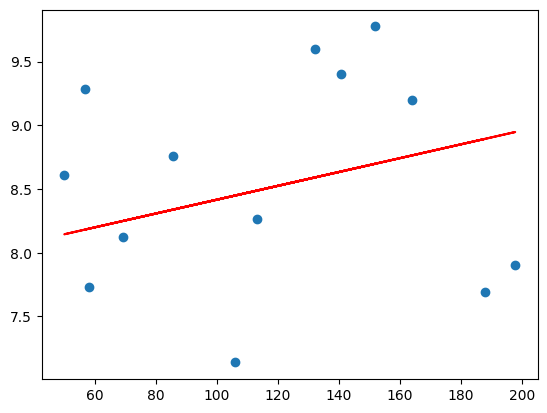

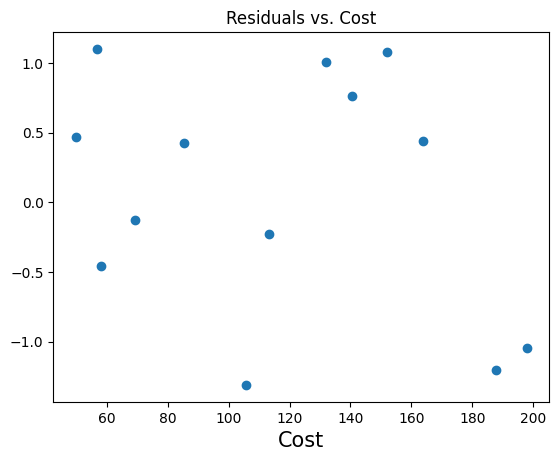

In [25]:
#Plot the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

#Evaluate variance
#Diagnostics
test_residuals=(y_test-y_test_fitted)

#Residuals vs. predictor
plt.title('Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

#Non-constant variance reduced, but we also reduced our coefficient of determination